<a href="https://colab.research.google.com/github/GauravPatel89/EVA-Track3-Assignments/blob/master/Session4/Session4_ArchitecturalBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

Following block installs keras in current runtime


In [1]:
# https://keras.io/
# !pip install -q keras
import keras

Using TensorFlow backend.


Import the different packages to use in our code.

Last line imports the MNIST dataset

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint,Callback

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Load MNIST dataset

X_train - input training data

y_train - training outputs corresponding to X_train

X_test - input testing data

y_test - testing outputs corresponding to X_test

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Print the size of X_train.

-Size of training set is 60000 images of size 28x28

-Show first input training image.

(60000, 28, 28)


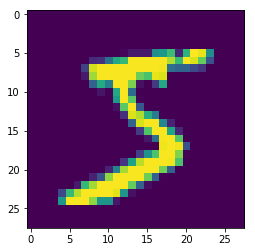

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Change the size of X_train and X_test from 60000x28x28 to 60000x28x28x1
We are adding one more level of dimension to the input. 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Right now dataset loaded is of type uint8. Each pixel is integer of size 8 bit. We first convert training data to float of size 32 bits.

To normalize the image data we divide whole data by 255 i.e. highest 8bit value for a pixel. After the division all the pixel values are between 0.0 and 1.0 float32.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Print first 10 output classes for training dataset.

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert training and test output from simple class number to 'one hot encoding'. In this encoding we have as many bits as the number of classes.We have binary '1' for bit number corresponding to the class of the input. For other classes we have '0'.

eg. '5' == '0 0 0 0 1 0 0 0 0 0' ; '10' == '0 0 0 0 0 0 0 0 0 1'

In [0]:

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]           # print the first 10 training outputs

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# First Code 
This is a Vannila network. We will not use BatchNormalization, DropOut, LR scheduler etc.

We will try to finalize our model architecture in this code i.e. number of kernels to use, position of transition layer etc.

In [15]:
model1 = Sequential()
                                                                              # RF = 1x1    i/p = 28x28x1     
model1.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))  # RF = 3x3    i/p = 28x28x1  kernel = (3x3x1)x8   o/p = 26x26x8
model1.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 5x5    i/p = 26x26x1  kernel = (3x3x8)x12  o/p = 24x24x12

# 1x1 Conv
model1.add(Convolution2D(8, 1, activation='relu'))                            # RF = 5x5    i/p = 24x24x12 kernel = (1x1x12)x8  o/p = 24x24x8
# 2x2 MaxPooling
model1.add(MaxPooling2D(pool_size=(2, 2)))                                    # RF = 10x10  i/p = 24x24x8  kernel = MaxPool2x2  o/p = 12x12x8

model1.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 12x12  i/p = 12x12x8  kernel = (3x3x8)x12  o/p = 10x10x12
model1.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 14x14  i/p = 10x10x12 kernel = (3x3x12)x12 o/p = 8x8x12
model1.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 16x16  i/p =  8x8x12  kernel = (3x3x12)x12 o/p = 6x6x12

# 1x1 Conv
model1.add(Convolution2D(12, 1, activation='relu'))                           # RF = 16x16  i/p = 6x6x12   kernel = (1x1x12)x12 o/p = 6x6x12
model1.add(Convolution2D(10, 6, 6))                                           # RF = 21x21  i/p = 6x6x12   kernel = (6x6x12)x10 o/p = 1x1x10
model1.add(Flatten())                                                         # flatten the 1x1x10 array into 10x1 array
model1.add(Activation('softmax'))                                             # apply the softmax function to obtain classification weights

model1.summary()   #Show model information

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 12)        876       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 8)         104       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 12)        876       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 12)          1308      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 12)         

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: 

In [0]:
# compile the model by specifyinng the optimizer, loss function, and training metrics to be used
model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])



In [17]:
#start the model training with test sample validation after each epoch. Use batch size as 32 and number of epochs as 20

model1.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=32, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 363us/step - loss: 0.2202 - acc: 0.9289 - val_loss: 0.0624 - val_acc: 0.9798
Epoch 2/30
60000/60000 [==============================] - 21s 352us/step - loss: 0.0702 - acc: 0.9792 - val_loss: 0.0522 - val_acc: 0.9842
Epoch 3/30
60000/60000 [==============================] - 21s 352us/step - loss: 0.0565 - acc: 0.9825 - val_loss: 0.0644 - val_acc: 0.9796
Epoch 4/30
60000/60000 [==============================] - 21s 353us/step - loss: 0.0471 - acc: 0.9857 - val_loss: 0.0430 - val_acc: 0.9867
Epoch 5/30
60000/60000 [==============================] - 21s 355us/step - loss: 0.0407 - acc: 0.9870 - val_loss: 0.0362 - val_acc: 0.9889
Epoch 6/30
60000/60000 [==============================] - 21s 352us/step - loss: 0.0376 - acc: 0.9881 - val_loss: 0.0374 - val_acc: 0.9886
Epoch 7/30
60000/60000 [==============================] - 21s 352us/step - loss: 0.0324 - acc: 0.9896 - val_loss: 0.

### First Code Observations

Network has 9038 parameters, well below target of 15k.

If we look at the validation accuracy we are achieving
Validation accuracy as high as 98.89% (Epoch 5) in first 10 epochs and this crosses 99% (99.10 Epoch 28) if we continue for 30 epochs.

Thus we can say the model has potential. The accuracy is going to increase once we add BatchNorm, Dropout, LR. So we can proceed with this architecture.


# Second Code 

In this iteration we will add **BatchNormalization** to **model1** after every convolution and see if it helps.

In [19]:
model2 = Sequential()
                                                                              # RF = 1x1    i/p = 28x28x1     
model2.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))  # RF = 3x3    i/p = 28x28x1  kernel = (3x3x1)x8   o/p = 26x26x8
model2.add(BatchNormalization())      # Batch Normalization


model2.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 5x5    i/p = 26x26x1  kernel = (3x3x8)x12  o/p = 24x24x12
model2.add(BatchNormalization())      # Batch Normalization

# 1x1 Conv
model2.add(Convolution2D(8, 1, activation='relu'))                            # RF = 5x5    i/p = 24x24x12 kernel = (1x1x12)x8  o/p = 24x24x8
# 2x2 MaxPooling
model2.add(MaxPooling2D(pool_size=(2, 2)))                                    # RF = 10x10  i/p = 24x24x8  kernel = MaxPool2x2  o/p = 12x12x8

model2.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 12x12  i/p = 12x12x8  kernel = (3x3x8)x12  o/p = 10x10x12
model2.add(BatchNormalization())      # Batch Normalization

model2.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 14x14  i/p = 10x10x12 kernel = (3x3x12)x12 o/p = 8x8x12
model2.add(BatchNormalization())      # Batch Normalization

model2.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 16x16  i/p =  8x8x12  kernel = (3x3x12)x12 o/p = 6x6x12
model2.add(BatchNormalization())      # Batch Normalization

# 1x1 Conv
model2.add(Convolution2D(12, 1, activation='relu'))                           # RF = 16x16  i/p = 6x6x12   kernel = (1x1x12)x12 o/p = 6x6x12
model2.add(BatchNormalization())      # Batch Normalization

model2.add(Convolution2D(10, 6, 6))                                           # RF = 21x21  i/p = 6x6x12   kernel = (6x6x12)x10 o/p = 1x1x10

model2.add(Flatten())                                                         # flatten the 1x1x10 array into 10x1 array
model2.add(Activation('softmax'))                                             # apply the softmax function to obtain classification weights

model2.summary()   #Show model information

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 12)        876       
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 8)         104       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 10, 10, 12)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`


In [20]:
# compile the model by specifyinng the optimizer, loss function, and training metrics to be used
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#start the model training with test sample validation after each epoch. Use batch size as 32 and number of epochs as 20

model2.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=32, nb_epoch=20, verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s 590us/step - loss: 0.1863 - acc: 0.9426 - val_loss: 0.0793 - val_acc: 0.9751
Epoch 2/20
60000/60000 [==============================] - 33s 557us/step - loss: 0.0610 - acc: 0.9807 - val_loss: 0.0582 - val_acc: 0.9812
Epoch 3/20
60000/60000 [==============================] - 33s 556us/step - loss: 0.0478 - acc: 0.9851 - val_loss: 0.0425 - val_acc: 0.9860
Epoch 4/20
60000/60000 [==============================] - 33s 556us/step - loss: 0.0391 - acc: 0.9874 - val_loss: 0.0495 - val_acc: 0.9832
Epoch 5/20
60000/60000 [==============================] - 33s 555us/step - loss: 0.0336 - acc: 0.9890 - val_loss: 0.0421 - val_acc: 0.9876
Epoch 6/20
60000/60000 [==============================] - 33s 555us/step - loss: 0.0302 - acc: 0.9899 - val_loss: 0.0486 - val_acc: 0.9849
Epoch 7/20
60000/60000 [==============================] - 33s 551us/step - loss: 0.0260 - acc: 0.9914 - val_loss: 0.

### Second Code Observations

BatchNormalization has increased trainable parameters from 9038 to 9174 and also added 136 nontrainable parameters.

If we look at the validation accuracy we are achieving
Validation accuracy as high as 98.98% (Epoch 19) in 20 epochs

If we look at the training accuracy, we are hitting high of 99.65% . We can see there is considerable gap between training and validation accuracy (~ 0.67%). This may be due to overfitting because model is performing well on training set but not that well with test set. We can remedy this by introdicing DropOut.


# Third Code 


In this iteration we will add **DropOut** to **model2** after every convolution and see if it helps. 


In [21]:
model3 = Sequential()
                                                                              # RF = 1x1    i/p = 28x28x1     
model3.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))  # RF = 3x3    i/p = 28x28x1  kernel = (3x3x1)x8   o/p = 26x26x8
model3.add(BatchNormalization())      # Batch Normalization
model3.add(Dropout(0.05))             # DropOut 5%

model3.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 5x5    i/p = 26x26x1  kernel = (3x3x8)x12  o/p = 24x24x12
model3.add(BatchNormalization())      # Batch Normalization
model3.add(Dropout(0.08))             # DropOut 8%

# 1x1 Conv
model3.add(Convolution2D(8, 1, activation='relu'))                            # RF = 5x5    i/p = 24x24x12 kernel = (1x1x12)x8  o/p = 24x24x8
# 2x2 MaxPooling
model3.add(MaxPooling2D(pool_size=(2, 2)))                                    # RF = 10x10  i/p = 24x24x8  kernel = MaxPool2x2  o/p = 12x12x8

model3.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 12x12  i/p = 12x12x8  kernel = (3x3x8)x12  o/p = 10x10x12
model3.add(BatchNormalization())      # Batch Normalization
model3.add(Dropout(0.08))             # DropOut 8%

model3.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 14x14  i/p = 10x10x12 kernel = (3x3x12)x12 o/p = 8x8x12
model3.add(BatchNormalization())      # Batch Normalization
model3.add(Dropout(0.08))             # DropOut 8%

model3.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 16x16  i/p =  8x8x12  kernel = (3x3x12)x12 o/p = 6x6x12
model3.add(BatchNormalization())      # Batch Normalization
model3.add(Dropout(0.08))             # DropOut 8%

# 1x1 Conv
model3.add(Convolution2D(12, 1, activation='relu'))                           # RF = 16x16  i/p = 6x6x12   kernel = (1x1x12)x12 o/p = 6x6x12
model3.add(BatchNormalization())      # Batch Normalization
model3.add(Dropout(0.08))             # DropOut 8%

model3.add(Convolution2D(10, 6, 6))                                           # RF = 21x21  i/p = 6x6x12   kernel = (6x6x12)x10 o/p = 1x1x10

model3.add(Flatten())                                                         # flatten the 1x1x10 array into 10x1 array
model3.add(Activation('softmax'))                                             # apply the softmax function to obtain classification weights

model3.summary()   #Show model information

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 12)        876       
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 12)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 24, 24, 8)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`


In [22]:
# compile the model by specifyinng the optimizer, loss function, and training metrics to be used
model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#start the model training with test sample validation after each epoch. Use batch size as 32 and number of epochs as 20

model3.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=32, nb_epoch=20, verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 39s 653us/step - loss: 0.2205 - acc: 0.9299 - val_loss: 0.0616 - val_acc: 0.9800
Epoch 2/20
60000/60000 [==============================] - 37s 622us/step - loss: 0.0760 - acc: 0.9762 - val_loss: 0.0516 - val_acc: 0.9828
Epoch 3/20
60000/60000 [==============================] - 37s 621us/step - loss: 0.0618 - acc: 0.9800 - val_loss: 0.0433 - val_acc: 0.9859
Epoch 4/20
60000/60000 [==============================] - 37s 618us/step - loss: 0.0508 - acc: 0.9841 - val_loss: 0.0345 - val_acc: 0.9885
Epoch 5/20
60000/60000 [==============================] - 37s 617us/step - loss: 0.0494 - acc: 0.9848 - val_loss: 0.0446 - val_acc: 0.9850
Epoch 6/20
60000/60000 [==============================] - 37s 619us/step - loss: 0.0431 - acc: 0.9856 - val_loss: 0.0375 - val_acc: 0.9885
Epoch 7/20
60000/60000 [==============================] - 37s 617us/step - loss: 0.0405 - acc: 0.9863 - val_loss: 0.

In [23]:
model3.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=64, nb_epoch=10, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  256/60000 [..............................] - ETA: 32s - loss: 0.0846 - acc: 0.9844 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 20s 339us/step - loss: 0.0202 - acc: 0.9935 - val_loss: 0.0229 - val_acc: 0.9926
Epoch 2/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0184 - acc: 0.9941 - val_loss: 0.0240 - val_acc: 0.9924
Epoch 3/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0209 - acc: 0.9933 - val_loss: 0.0277 - val_acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0198 - acc: 0.9937 - val_loss: 0.0226 - val_acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0195 - acc: 0.9933 - val_loss: 0.0238 - val_acc: 0.9928
Epoch 6/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0197 - acc: 0.9935 - val_loss: 0.0265 - val_acc: 0.9922
Epoch 7/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0189 - acc: 0.9936 - val_loss: 0.0244 - val_acc: 0.9928
Epoch 8/10
60000/60000 [==============

In [24]:
model3.fit(X_train, Y_train,validation_data=(X_test, Y_test), batch_size=64, nb_epoch=10, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  448/60000 [..............................] - ETA: 20s - loss: 0.0261 - acc: 0.9933

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 20s 335us/step - loss: 0.0180 - acc: 0.9942 - val_loss: 0.0234 - val_acc: 0.9925
Epoch 2/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0182 - acc: 0.9939 - val_loss: 0.0256 - val_acc: 0.9923
Epoch 3/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0182 - acc: 0.9939 - val_loss: 0.0247 - val_acc: 0.9925
Epoch 4/10
60000/60000 [==============================] - 20s 336us/step - loss: 0.0173 - acc: 0.9944 - val_loss: 0.0232 - val_acc: 0.9928
Epoch 5/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0176 - acc: 0.9939 - val_loss: 0.0219 - val_acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0169 - acc: 0.9942 - val_loss: 0.0231 - val_acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.0160 - acc: 0.9944 - val_loss: 0.0250 - val_acc: 0.9919
Epoch 8/10
60000/60000 [==============

### Third Code Observations

The number of trainable and non-trainable parameters is unchanged from the last model because DropOut doesn't require any parameters


We trained this network for 20 epochs with batch size of 32 followed by 20 epochs with batch size of 64.


If we look at the validation accuracy, during the first 20 epochs validation accuracy is steadily increasing for around 12-13 epochs but then for rest of the epochs it seems as if model is stuck. Accuracy is increasing slighly or reducing a bit but more or less stuck. This could be because we are using constant learning rate (default value of ADAM).

We can remedy this by varying the learning rate with epoch. 

# Fourth Code (Final)


In this iteration model is same as previous iteration (**model3**) We will be introducing Learning rate scheduler. Instead of using fixed learning rate the scheduler will vary the LR based on Epoch number. It will go on reducing the LR. We will also be using larger batch size for training.

In [27]:
model4 = Sequential()
                                                                              # RF = 1x1    i/p = 28x28x1     
model4.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))  # RF = 3x3    i/p = 28x28x1  kernel = (3x3x1)x8   o/p = 26x26x8
model4.add(BatchNormalization())      # Batch Normalization
model4.add(Dropout(0.05))             # DropOut 5%

model4.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 5x5    i/p = 26x26x1  kernel = (3x3x8)x12  o/p = 24x24x12
model4.add(BatchNormalization())      # Batch Normalization
model4.add(Dropout(0.08))             # DropOut 8%

# 1x1 Conv
model4.add(Convolution2D(8, 1, activation='relu'))                            # RF = 5x5    i/p = 24x24x12 kernel = (1x1x12)x8  o/p = 24x24x8
# 2x2 MaxPooling
model4.add(MaxPooling2D(pool_size=(2, 2)))                                    # RF = 10x10  i/p = 24x24x8  kernel = MaxPool2x2  o/p = 12x12x8

model4.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 12x12  i/p = 12x12x8  kernel = (3x3x8)x12  o/p = 10x10x12
model4.add(BatchNormalization())      # Batch Normalization
model4.add(Dropout(0.08))             # DropOut 8%

model4.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 14x14  i/p = 10x10x12 kernel = (3x3x12)x12 o/p = 8x8x12
model4.add(BatchNormalization())      # Batch Normalization
model4.add(Dropout(0.08))             # DropOut 8%

model4.add(Convolution2D(12, 3, 3, activation='relu'))                        # RF = 16x16  i/p =  8x8x12  kernel = (3x3x12)x12 o/p = 6x6x12
model4.add(BatchNormalization())      # Batch Normalization
model4.add(Dropout(0.08))             # DropOut 8%

# 1x1 Conv
model4.add(Convolution2D(12, 1, activation='relu'))                           # RF = 16x16  i/p = 6x6x12   kernel = (1x1x12)x12 o/p = 6x6x12
model4.add(BatchNormalization())      # Batch Normalization
model4.add(Dropout(0.08))             # DropOut 8%

model4.add(Convolution2D(10, 6, 6))                                           # RF = 21x21  i/p = 6x6x12   kernel = (6x6x12)x10 o/p = 1x1x10

model4.add(Flatten())                                                         # flatten the 1x1x10 array into 10x1 array
model4.add(Activation('softmax'))                                             # apply the softmax function to obtain classification weights

model4.summary()   #Show model information

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_24 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 12)        876       
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 12)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 8)        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.009 * 1/(1 + 0.55 * epoch), 10)

model4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.009), metrics=['accuracy'])

model4.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.009.
60000/60000 [==============================] - 17s 283us/step - loss: 0.0516 - acc: 0.9837 - val_loss: 0.0345 - val_acc: 0.9883
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0058064516.
60000/60000 [==============================] - 12s 208us/step - loss: 0.0357 - acc: 0.9885 - val_loss: 0.0359 - val_acc: 0.9886
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0042857143.
60000/60000 [==============================] - 12s 206us/step - loss: 0.0291 - acc: 0.9905 - val_loss: 0.0276 - val_acc: 0.9913
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0033962264.
60000/60000 [==============================] - 13s 210us/step - loss: 0.0259 - acc: 0.9918 - val_loss: 0.0238 - val_acc: 0.9923
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0028125.
60000/60000 [=====

### Fourth Code Observations

The number of trainable and non-trainable parameters is unchanged from the last model.

We see that we are achieving validation accuracy of 99.45% in the 12th epoch. 

Thus our objective is achieved. 
99.45% accuracy with 9k parameters